<a href="https://colab.research.google.com/github/Maxwell-Tuttle/COS470/blob/main/COS470_Assignment1_Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = "Posts_Coffee.xml"

In [10]:
df = pd.read_xml(data)

In [11]:
df

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,...,CommentCount,FavoriteCount,ContentLicense,LastEditorUserId,LastEditDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName,CommunityOwnedDate
0,1,1,24.0,2015-01-27T20:09:32.720,48,2847.0,"<p>I just got a pound of microroasted, local c...",4.0,2019-02-04T13:15:48.970,How should I store whole bean coffee?,...,4,11.0,CC BY-SA 3.0,NaN,None,NaN,None,None,None,None
1,2,1,22.0,2015-01-27T20:13:58.610,7,1066.0,<p>I manually grind coffee beans for drip coff...,8.0,2015-01-27T21:13:20.537,How fine should I grind coffee for drip/pour o...,...,4,NaN,CC BY-SA 3.0,8.0,2015-01-27T21:13:20.537,NaN,None,None,None,None
2,3,1,15.0,2015-01-27T20:20:05.700,30,1614.0,<p>I live in a hard water area and when brewin...,8.0,2019-11-28T09:51:33.867,Does the hardness of water matter when making ...,...,1,NaN,CC BY-SA 3.0,262.0,2016-05-02T01:36:46.847,NaN,None,None,None,None
3,4,1,37.0,2015-01-27T20:30:33.657,10,302.0,"<p>I own a drip coffee pot:\n<img src=""https:/...",8.0,2015-01-27T21:58:54.353,What's the theory behind using thin spouted ke...,...,8,1.0,CC BY-SA 3.0,8.0,2015-01-27T21:26:01.250,NaN,None,None,None,None
4,5,1,8.0,2015-01-27T20:34:58.077,20,1212.0,<p>I observe that coffee servers (I refuse to ...,8.0,2022-02-24T19:13:05.100,How important is tamping coffee for an espress...,...,0,NaN,CC BY-SA 3.0,8.0,2015-01-27T20:46:23.583,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,5924,2,NaN,2022-05-20T20:48:39.647,0,NaN,<p>I just read that milk binds to the tannins ...,11461.0,2022-05-20T20:48:39.647,None,...,1,NaN,CC BY-SA 4.0,NaN,None,2570.0,None,None,None,None
4209,5925,1,NaN,2022-05-26T16:23:56.667,0,30.0,<p>I have an 8 months old Delonghi ecp3420 tha...,11471.0,2022-05-26T16:26:03.550,Yet another question about no pressure in coff...,...,2,NaN,CC BY-SA 4.0,6506.0,2022-05-26T16:26:03.550,NaN,None,None,None,None
4210,5927,2,NaN,2022-05-31T21:17:32.843,2,NaN,<h1>No</h1>\n<p>The short answer is just <stro...,9401.0,2022-05-31T21:17:32.843,None,...,0,NaN,CC BY-SA 4.0,NaN,None,2815.0,None,None,None,None
4211,5928,1,NaN,2022-06-03T16:34:00.753,0,10.0,<p>When I landed to my new job I was surprised...,11489.0,2022-06-03T16:34:00.753,Should we clean portafilter immediately?,...,0,NaN,CC BY-SA 4.0,NaN,None,NaN,None,None,None,None


In [36]:
q_list = df['Title'].values.tolist()

In [38]:
#Get rid of None values
temp_list = []
for val in q_list:
  if val != None:
    temp_list.append(val)

q_list = temp_list

In [54]:
#turn the list into a string and turns to all lower case
string = ""
for ele in q_list:
  string += (ele + " ")

string = string.lower()
print(string)

how should i store whole bean coffee? how fine should i grind coffee for drip/pour over coffee does the hardness of water matter when making coffee? what's the theory behind using thin spouted kettles when making drip/pour over coffee how important is tamping coffee for an espresso machine why is it not recommended to drink coffee immediately after it's roasted? what factors affect espresso crema? why do barista's keep activating the doser whilst grinding coffee how should i store ground coffee? how long can i store ground coffee in the fridge? what is the process to reduce bitterness in coffee? how does the temperature of the water affect the taste of the coffee homemade cleaner for basic drip coffee maker upward size limit for espresso makers are high-end cone grinders adjustable? what type of roast has the lowest caffeine content? how do i backflush my espresso machine? how hot should water be to brew ground coffee directly in a cup? what is the hexagon funnel shaped thing that came

In [55]:
#This stores the split words into "words" and prints the length to gives total and unique word counts
words = string.split(" ")
print("Total words: " + str(len(words)))
print("Unique words: " + str(len(set(words))))

Total words: 12296
Unique words: 2766


In [56]:
frequency = {}

words = re.findall(r'\b[A-Za-z][a-z]{2,9}\b', string)
        
for word in words:
  count = frequency.get(word,0)
  frequency[word] = count + 1

most_frequent = dict(sorted(frequency.items(), key=lambda elem: elem[1], reverse=True))

top_count = 0
        
for idx, (words, frequency) in enumerate(most_frequent.items()):
  if idx == 0:
    top_count = frequency
  print(words, frequency, round(top_count/frequency, 2))

coffee 771 1.0
the 415 1.86
how 276 2.79
what 270 2.86
for 192 4.02
does 138 5.59
espresso 138 5.59
and 129 5.98
with 111 6.95
can 110 7.01
are 98 7.87
beans 92 8.38
why 78 9.88
machine 74 10.42
make 73 10.56
moka 72 10.71
water 68 11.34
pot 65 11.86
brew 64 12.05
should 62 12.44
press 58 13.29
caffeine 57 13.53
when 56 13.77
cup 54 14.28
taste 53 14.55
french 51 15.12
ground 50 15.42
cold 50 15.42
there 50 15.42
use 47 16.4
brewing 47 16.4
milk 46 16.76
filter 46 16.76
from 45 17.13
grinder 39 19.77
between 39 19.77
good 36 21.42
after 35 22.03
that 34 22.68
aeropress 34 22.68
using 32 24.09
difference 32 24.09
you 32 24.09
drip 31 24.87
long 30 25.7
grind 29 26.59
pour 29 26.59
any 29 26.59
this 29 26.59
instant 29 26.59
over 28 27.54
not 28 27.54
much 28 27.54
get 28 27.54
best 28 27.54
shot 27 28.56
grounds 26 29.65
maker 25 30.84
roast 25 30.84
affect 24 32.12
which 24 32.12
time 24 32.12
bean 23 33.52
home 23 33.52
way 23 33.52
have 23 33.52
before 23 33.52
method 23 33.52
too 23

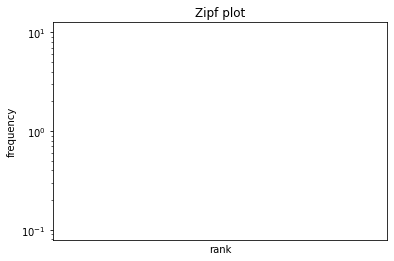

In [57]:
plt.clf()
plt.xscale('log')
plt.yscale('log')
plt.title('Zipf plot')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.plot(words, frequency, 'r-')
plt.show()